In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Business Understanding

This is HR_Analytics. The fundamental reason for this analysis is to find out reasons for employee turnover and also try to find out probable solution to reduce turnover rate.

#### Load the data

In [2]:
df = pd.read_csv("data/HR_comma_sep.csv")

### Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Preperation

#### Convert all the column names to lower case

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.columns = map(str.lower, df.columns)

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
df.rename(columns = {"sales": "department"},inplace = True)

In [9]:
df.shape

(14999, 10)

#### Identify target variable and rearrange the dataset

In [10]:
last = df['left']
df.drop(labels=['left'], axis=1,inplace = True)
df.insert(len(df.columns), 'left', last)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


#### Missing value and duplication check

In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

missing value count in entire dataset is 0.

In [12]:
df[df.duplicated() == True]
df.drop_duplicates(inplace = True)
df.shape

(11991, 10)

duplicates are removed

### EDA

#### We will try to answer following questions?

* Is low salary a reason for employee turnover?
* Which department has the highest turnover rate ?
* Does satisfaction level for employees who left the company differ from the employees who stayed in the compny?
* Is there any pattern in the evalutaion metric for employees who left the company? etc.

In [13]:
# Statistical overview
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.016929,0.166041
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.129012,0.372133
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
# [Overview] : left the company vs stayed
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,0.019789,-0.350558
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,-0.007206,0.013520
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,-0.000544,0.030928
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,-0.004964,0.070409
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.056828,0.173295
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,0.029852,-0.125436
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,1.000000,-0.044657
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,-0.044657,1.000000


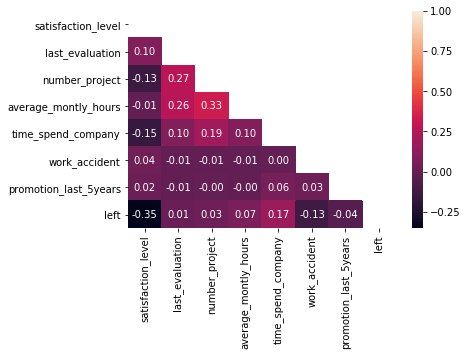

In [15]:
# Correlation Matrix and heatmap

#Correlation Matrix
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
corr = (corr)
sns.heatmap(corr,
            annot = True,
            fmt = ".2f",
            mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

#### Moderate Positively Correlated Features:

* number_project vs last_evaluation: 0.27
* number_project vs average_montly_hours: 0.33
* average_montly_hours vs last_evaluation: 0.26

#### Moderate Negatively Correlated Feature:

* satisfaction vs left: -0.35

#### Summary:

From the heatmap, there is a positive(+) correlation between number_project, average_montly_hours and last_evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, left and satisfaction_level are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

#### Correlation is not cusation. So we are going to conduct hypothesis testing (T - test)

* One sample T-test
  satisfaction_level has the positive correlation with our dependent variable left, let's test to see if the average            satisfaction_level of employees who have left the comapany differs from the those who have stayed.


#### Hypothesis Testing: 

* Null Hypothesis: (H0) The null hypothesis would be that there is no difference in satisfaction level between employees who did turnover and those who did not..

* Alternate Hypothesis: (HA) The alternative hypothesis would be that there is a difference in satisfaction level between employees who did turnover and those who did not
  

In [16]:
emp_stayed_satisfaction = df[df.left == 0].satisfaction_level.mean()
emp_left_satisfaction = df[df.left == 1].satisfaction_level.mean()

print( 'The mean satisfaction for the employee who have stayed in the company: ' + str(emp_stayed_satisfaction))
print( 'The mean satisfaction for employees who have left in the company: ' + str(emp_left_satisfaction) )

The mean satisfaction for the employee who have stayed in the company: 0.6673649999999947
The mean satisfaction for employees who have left in the company: 0.4402712204922172


In [17]:
# T-test
import scipy.stats as stats

stats.ttest_1samp(a = df[df.left == 1].satisfaction_level, popmean = emp_stayed_satisfaction)

Ttest_1sampResult(statistic=-38.20818061354161, pvalue=4.83748526995468e-240)

In [18]:
stats.ttest_1samp(a=  df[df['left']==1]['satisfaction_level'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_stayed_satisfaction)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-38.20818061354161, pvalue=4.83748526995468e-240)

* The distribution is outside the confidence interval boundary so we can reject the null hypothesis

#### Salary vs Left : Is low salary a reason for employee turnover?

Text(0.5,1,'Employee Salary vs left Distribution')

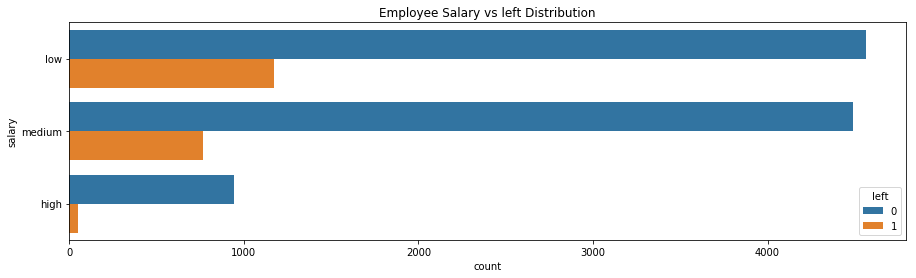

In [19]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary vs left Distribution')

#### Department vs Left : Which department has the highest turnover rate ?

Text(0.5,1,'Employee dept. vs left Distribution')

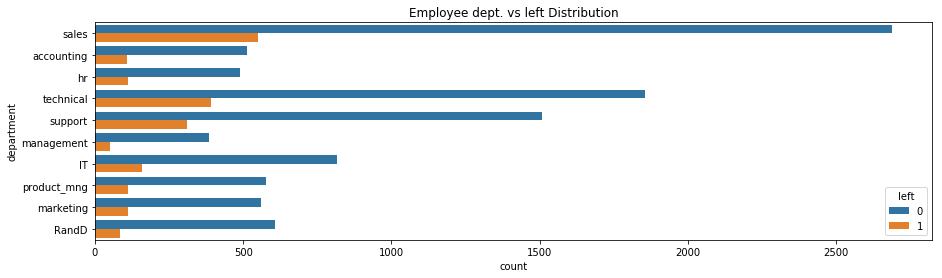

In [20]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="department", hue='left', data=df).set_title('Employee dept. vs left Distribution')

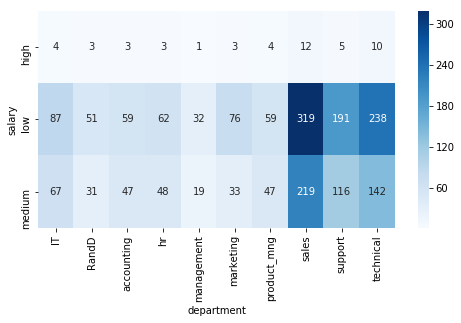

In [55]:
plt.figure(figsize=(8,4))
df_dept_sal = pd.DataFrame(df.groupby(['department','salary'])['left'].sum().reset_index())
_ = sns.heatmap(pd.pivot(df_dept_sal.salary, df_dept_sal.department, df_dept_sal.left), annot = True, fmt = 'g', cmap = 'Blues')

* The rate of employee turnover is very low for high salaried employees irrespective of departments
* The rate of employee turnover is very high for low and medium salaried employees who works in sales, support and technical deprtment

In [80]:
# fig = plt.figure(figsize=(6,6))
# ax = sns.kdeplot(df.loc[(df['left'] == 1) & ((df['department'] == 'sales'))].satisfaction_level , color='r', shade=True, label = 'sales')
# ax = sns.kdeplot(df.loc[(df['left'] == 1) & ((df['department'] == 'support'))].satisfaction_level , color='g', shade=True, label = 'support')
# ax = sns.kdeplot(df.loc[(df['left'] == 1) & ((df['department'] == 'technical'))].satisfaction_level , color='b', shade=True, label = 'technical')

# ax.set(xlabel='satisfaction_level', ylabel='Frequency')
# plt.title('satisfaction_level in sales,support and technicl departmen(left)')

In [84]:
# fig = plt.figure(figsize=(6,6))
# ax = sns.kdeplot(df.loc[(df['left'] == 0) & ((df['department'] == 'sales'))].satisfaction_level , color='r', shade=True, label = 'sales')
# ax = sns.kdeplot(df.loc[(df['left'] == 0) & ((df['department'] == 'support'))].satisfaction_level , color='g', shade=True, label = 'support')
# ax = sns.kdeplot(df.loc[(df['left'] == 0) & ((df['department'] == 'technical'))].satisfaction_level , color='b', shade=True, label = 'technical')

# ax.set(xlabel='satisfaction_level', ylabel='Frequency')
# plt.title('satisfaction_level in sales,support and technical department(stayed)')

#### Satisfaction_leveldistribution : Does satisfaction level for employees who left the company differ from the employees who stayed in the compny?

In [82]:
# Created satisfaction_ditribution to stop duplicating same code multiple times
class UnAcceptedValueError(Exception):   
    def __init__(self, data):    
        self.data = data
    def __str__(self):
        return repr(self.data)
    
class IsNotBinaryError(Exception):   
    def __init__(self, data):    
        self.data = data
    def __str__(self):
        return repr(self.data)    
    
def satisfaction_ditribution(dept_list, color_code, left):
    try:
        if((left == 0) | (left == 1)):
            if(len(dept_list) == len(color_code)):
                fig = plt.figure(figsize=(6,6))
                color_counter = 0
                for dept in dept_list:
                    ax = sns.kdeplot(df.loc[(df['left'] == left) & ((df['department'] == dept ))]\
                                         .satisfaction_level , color = color_code[color_counter], shade=True, label = 'sales')
                    color_counter += 1
                ax.set(xlabel='satisfaction_level', ylabel='Frequency')
                if(left == 0):
                    plt.title('satisfaction_level in sales,support and technical department(stayed)')
                else:
                    plt.title('satisfaction_level in sales,support and technical department(left)')

            else:
                raise UnAcceptedValueError("No. of color code should match with no. dept.")
        else:
            raise IsNotBinaryError("Value of 'left' should be 0 or 1. 0 = stayed, 1 = left")
    except UnAcceptedValueError as e:
        print("Received error:", e.data)
    
    except IsNotBinaryError as e1:
        print("Received error:", e1.data)

C:\Users\Shankhadeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


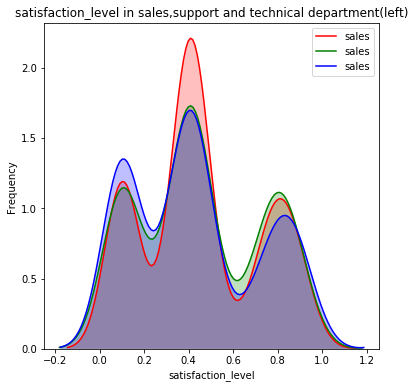

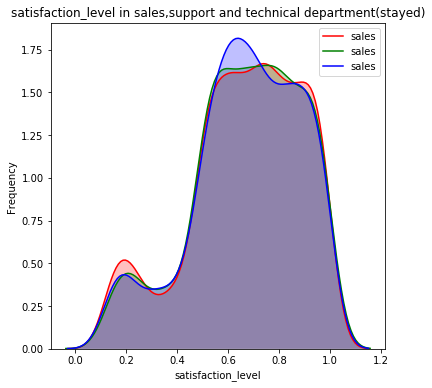

In [83]:
dept_list = ['sales','support','technical']
color_code = ['r','g','b']
# satisfaction_ditribution for employees who left
satisfaction_ditribution(dept_list,color_code,left = 1)
# satisfaction_ditribution for employees who satyed
satisfaction_ditribution(dept_list,color_code,left = 0)

#### Left vs Evaluation

C:\Users\Shankhadeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Employee Evaluation Distribution - left vs stayed')

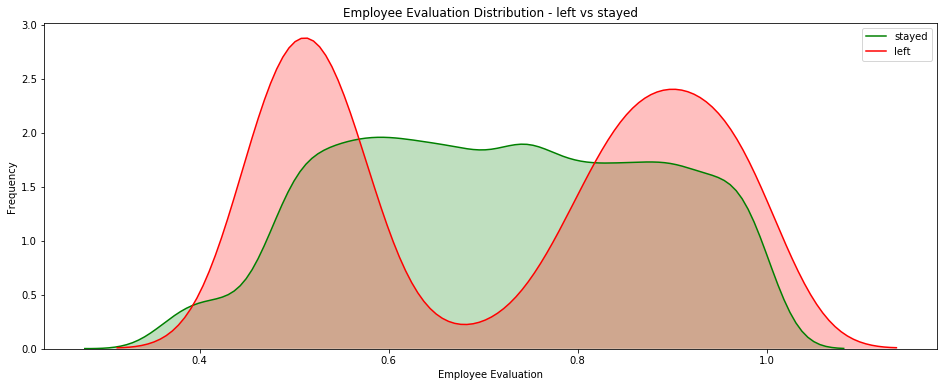

In [32]:
# Kernel Density Plot
fig = plt.figure(figsize=(16,6))
ax = sns.kdeplot(df.loc[df['left'] == 0].last_evaluation , color='g', shade=True, label = 'stayed')
ax = sns.kdeplot(df.loc[df['left'] == 1].last_evaluation , color='r', shade=True, label = 'left')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - left vs stayed')

* Employess who are evaluated as low performer and high performer most likely to leave the company
    * Assumpltion :
                  1. Low performers are thinking their evaluation is unjustified or biased
                  2. High performers are mostlikely getting better offer outside the company

* Employees who are evaluated with 0.6 to 0.8 performence metric most likely to stay.
                 

#### Satisfaction VS Evaluation

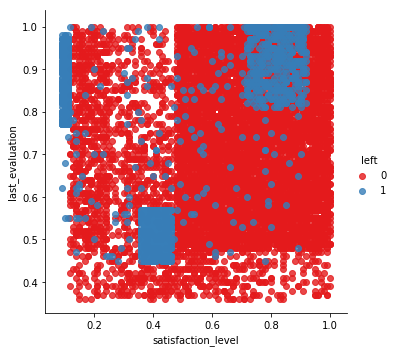

In [37]:
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=df, palette="Set1",
           fit_reg=False, # No regression line
           hue='left') # Color by evolution stage

* There are 3 clusters of left employees
    * Cluster 1 : Employees with high performance rating but very low satisfaction level (Most interesting employees who left the company)(satisfaction_level : < 0.2 and last_evaluation > 0.75)
    * Cluster 2: Employees with low performance rating and low satisfaction level 
    * Cluster 3: Employees with high performance rating and high satisfaction level

#### satisfaction_level : < 0.2 and last_evaluation > 0.75 and left the company
#### let's check their salary

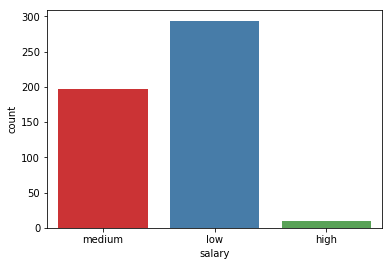

In [51]:
sns.countplot(df.loc[(df.satisfaction_level < 0.2) & (df.last_evaluation > 0.75) & (df.left == 1)]['salary'], palette="Set1")

* We can conclude that despite high performence rating  cluster1 employees were getting low or medium salary which possibly forced them to leave the company